# 실습 준비하기

In [1]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmss10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'cmmi10',
 'DejaVu Serif',
 'cmb10',
 'cmsy10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'cmtt10',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'Rage Italic',
 'Constantia',
 'HYPost-Light',
 'Consolas',
 'Haettenschweiler',
 'Blackadder ITC',
 'Curlz MT',
 'Bookman Old Style',
 'Stencil',
 'Copperplate Gothic Light',
 'Arial',
 'Yu Gothic',
 'Segoe Print',
 'Franklin Gothic Medium',
 'Mistral',
 'New Gulim',
 'Elephant',
 'Matura MT Script Capitals',
 'HancomEQN',
 'Bodoni MT',
 

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] =  'Malgun Gothic'
plt.rcParams['figure.dpi'] = 100

In [3]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\khj\데이터분석\ns_book7.csv
100%|█████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:03<00:00, 17.6MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


# 하나의 피겨에 여러 개의 선 그래프 그리기

In [8]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [11]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도','대출건수']]

In [12]:
ns_book9 = ns_book9.groupby(by=['출판사','발행년도']).sum()

In [14]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,index,출판사,발행년도,대출건수
858,858,황금가지,1995,0
859,859,황금가지,1996,67
860,860,황금가지,1997,116
861,861,황금가지,1998,526
862,862,황금가지,1999,505


In [15]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\4005126022.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


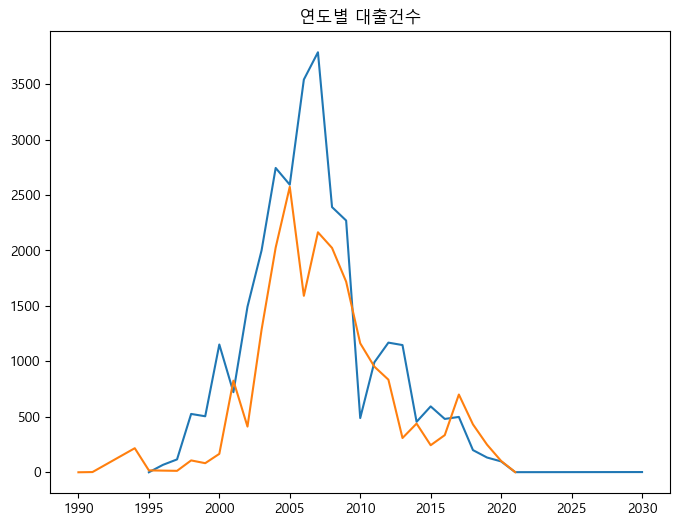

In [17]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\3666699176.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


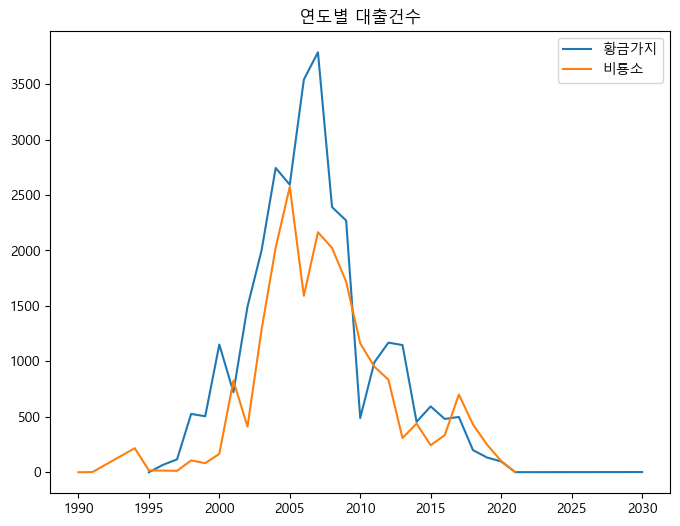

In [18]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1040329283.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


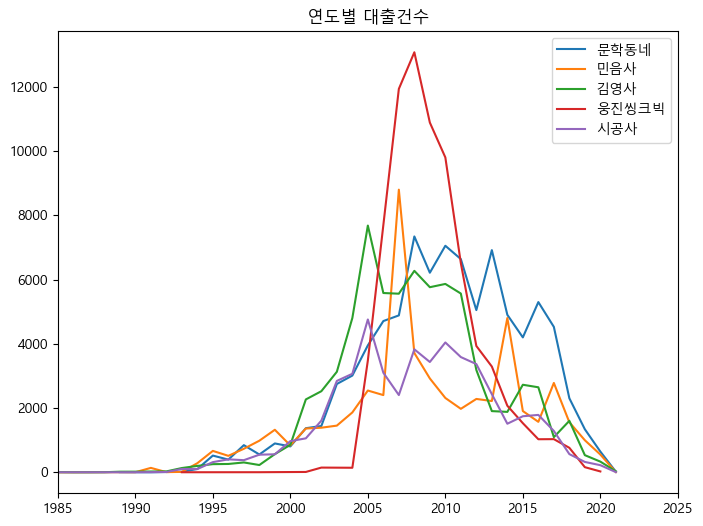

In [19]:
fig, ax = plt.subplots(figsize = (8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985,2025)
fig.show()

In [20]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

index                                                  ...    대출건수  \
발행년도  1947 1974 1975 1976 1977 1978 1979  1980  1981  1982  ...    2013   
출판사                                                         ...           
博英社    0.0  NaN  1.0  NaN  2.0  NaN  NaN   NaN   NaN   NaN  ...     NaN   
길벗     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1162.0   
김영사    NaN  NaN  NaN  NaN  NaN  NaN  NaN  64.0  65.0  66.0  ...  1905.0   
넥서스    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1828.0   
다산북스   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1100.0   

                                                                       
발행년도    2014    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                                    
博英社    118.0    57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1619.0  1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   1881.0  2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스   1429.0   765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1361.0  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 100 columns]

In [21]:
ns_book10.columns[:10]

MultiIndex([('index', 1947),
            ('index', 1974),
            ('index', 1975),
            ('index', 1976),
            ('index', 1977),
            ('index', 1978),
            ('index', 1979),
            ('index', 1980),
            ('index', 1981),
            ('index', 1982)],
           names=[None, '발행년도'])

In [22]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\3085272373.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


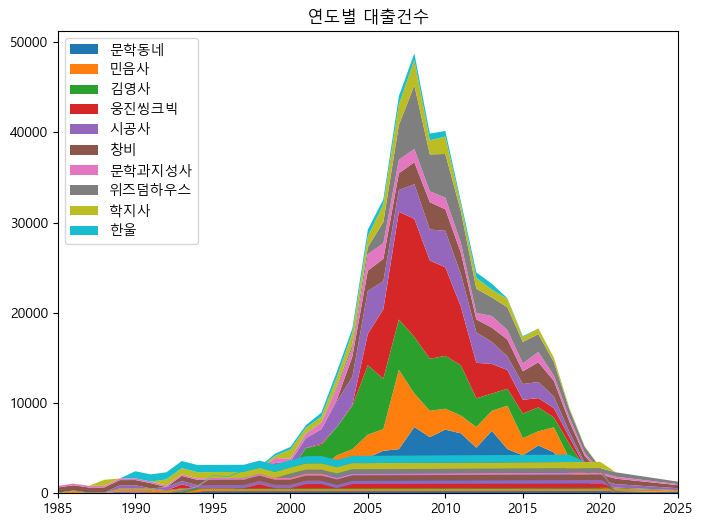

In [24]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

# 하나의 피겨에 여러 개의 막대 그래프 그리기

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\233705359.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


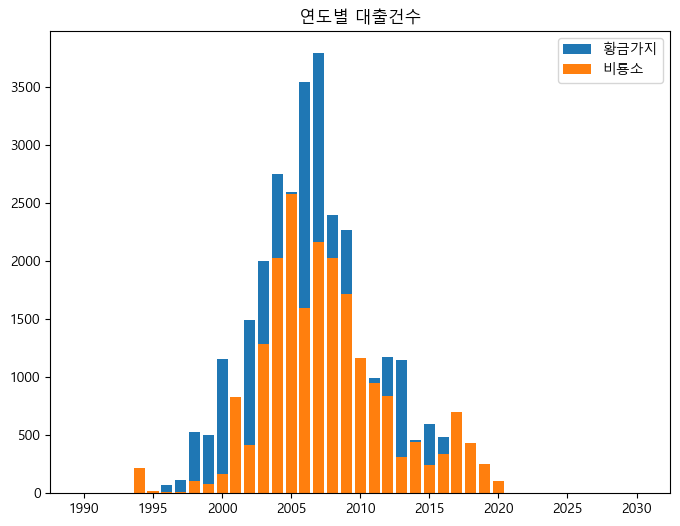

In [25]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1779329620.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


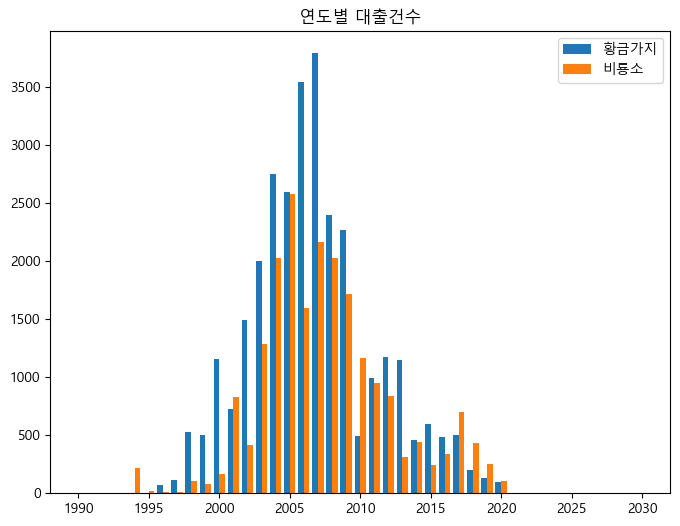

In [26]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

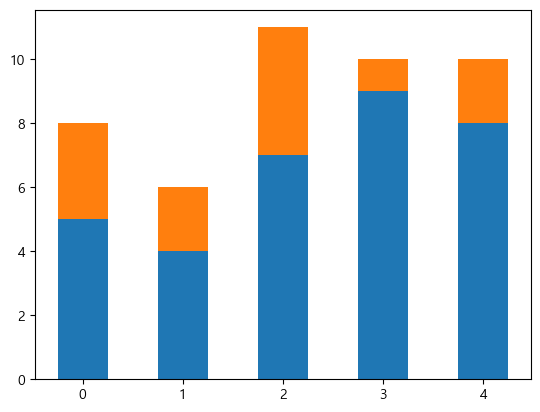

In [28]:
height1 = [5,4,7,9,8]
height2 = [3,2,4,1,2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

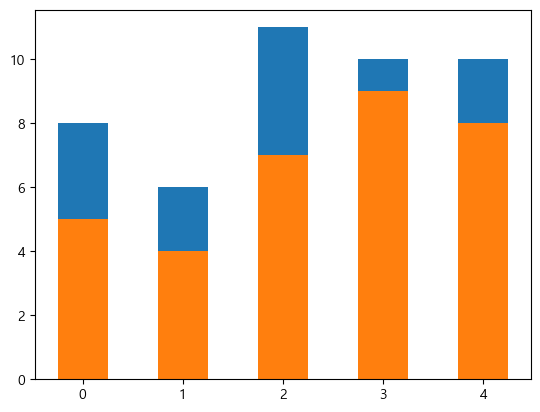

In [29]:
height3 = [a+b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

In [30]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [32]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [34]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1960912678.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


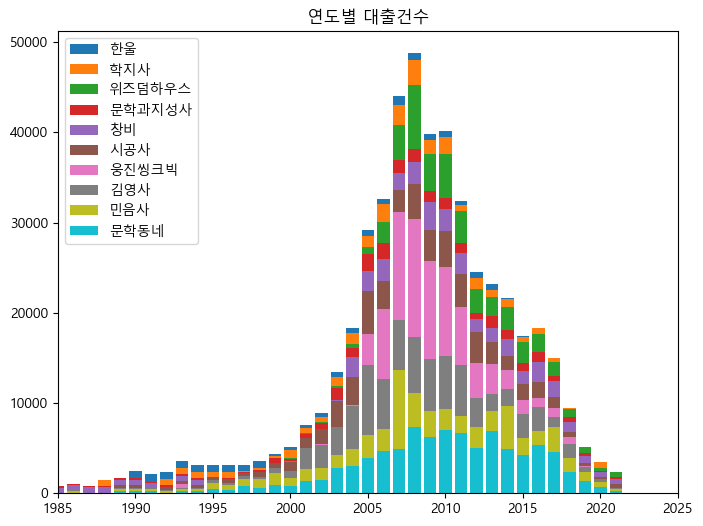

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    ax.bar(year_cols, bar, label=label)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

# 원 그래프 그리기

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1911029444.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


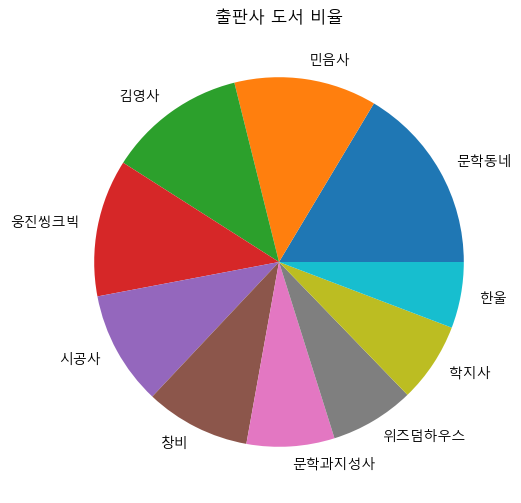

In [36]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

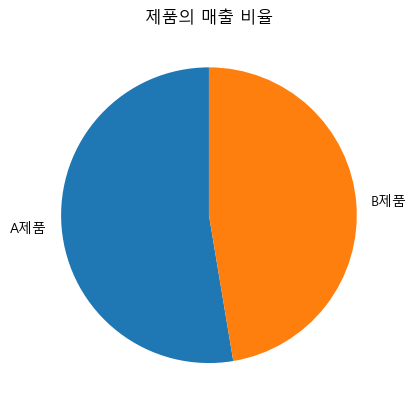

In [37]:
plt.pie([10,9], labels=['A제품','B제품'], startangle=90)
plt.title('제품의 매출 비율')
plt.show()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\3313552084.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


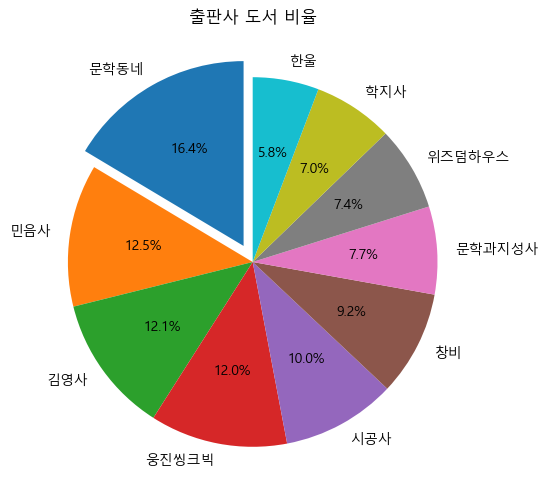

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

# 여러 종류의 그래프가 있는 서브플롯 그리기

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1291037327.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


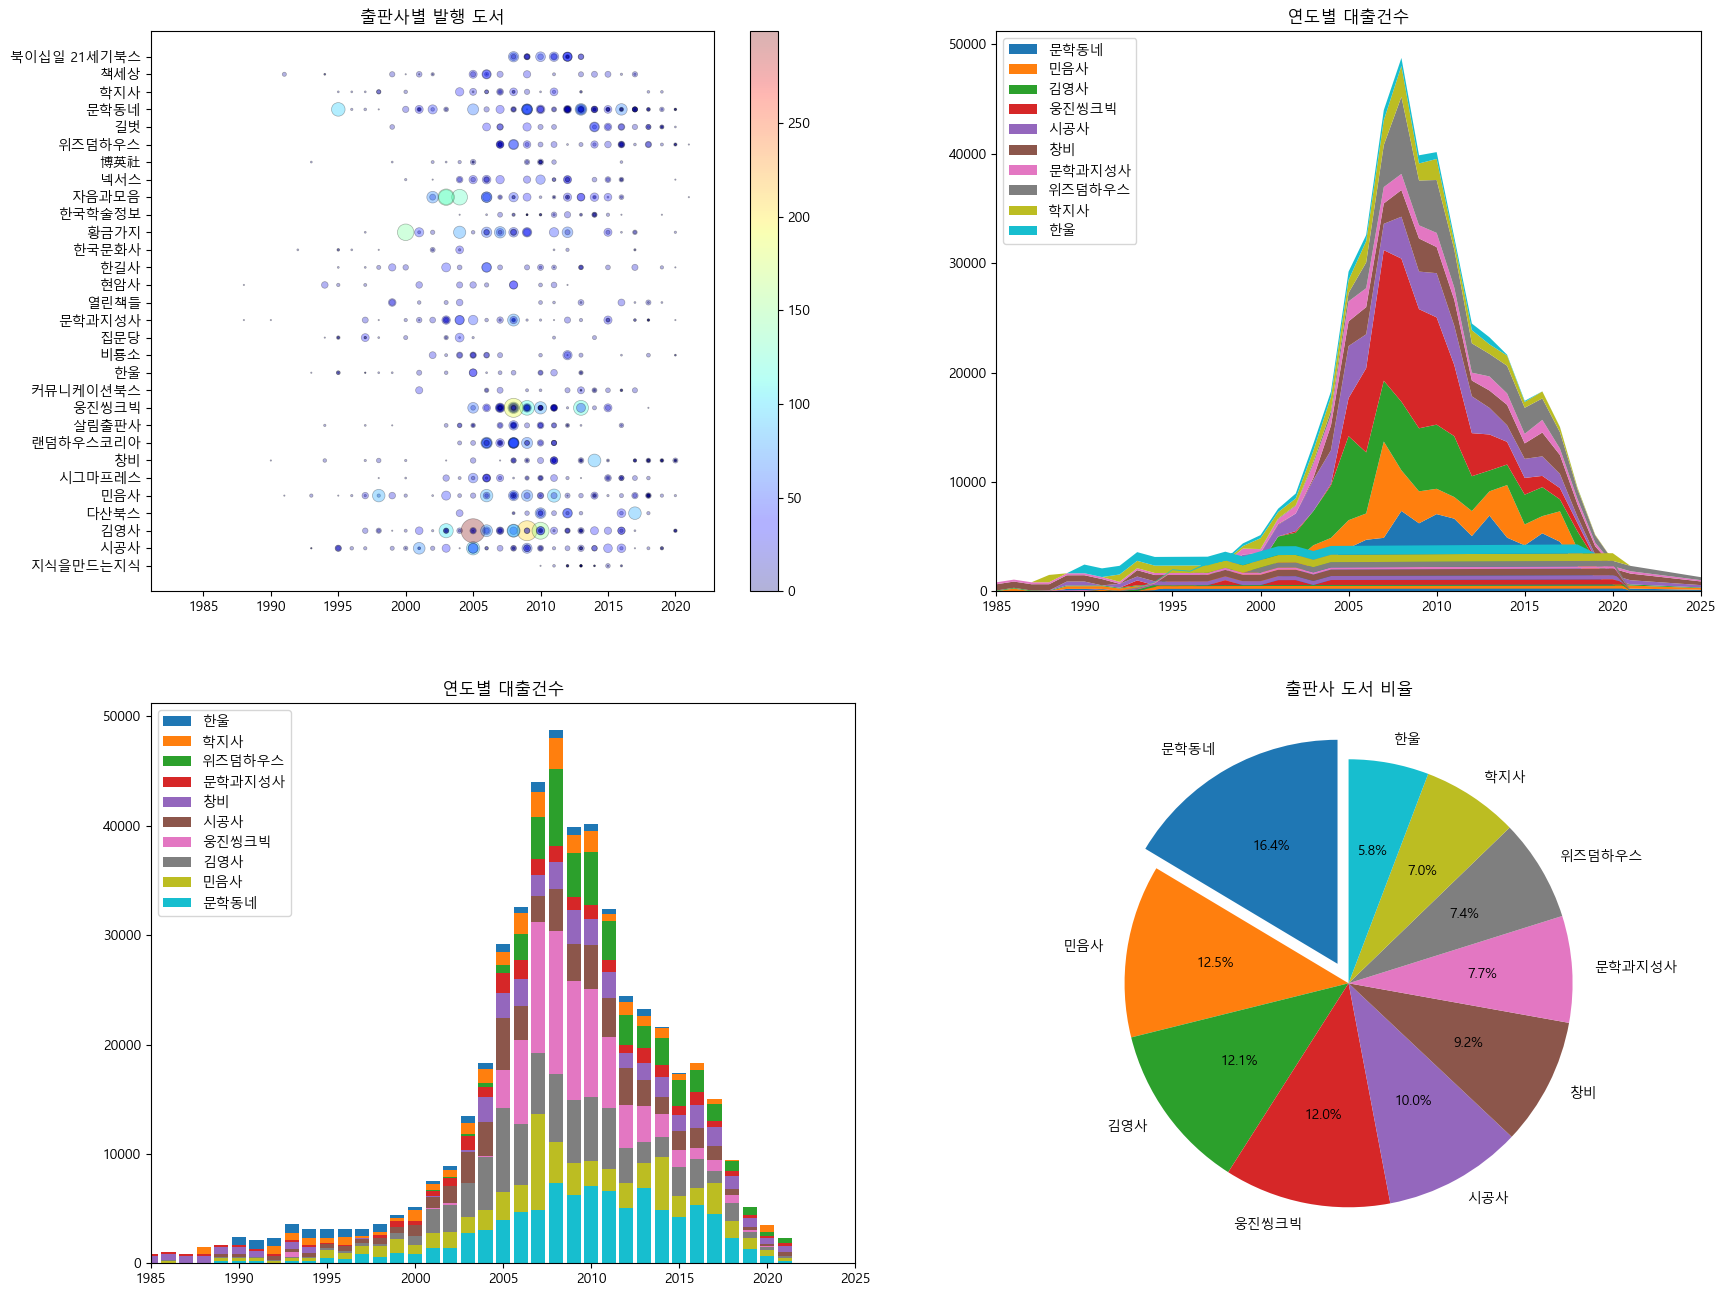

In [47]:
fig, axes = plt.subplots(2,2, figsize=(20, 16))

ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], lw=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0, 0])

axes[0,1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0,1].set_title('연도별 대출건수')
axes[0,1].legend(loc='upper left')
axes[0,1].set_xlim(1985, 2025)

for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('연도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

axes[1, 1].pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()

# 판다스로 여러 개의 그래프 그리기

In [48]:
ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


C:\Users\khj\AppData\Local\Temp\ipykernel_21840\1995719757.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


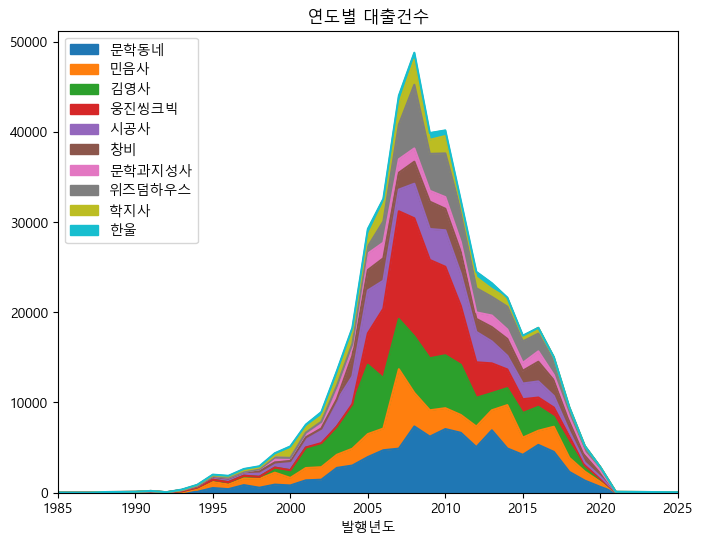

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
ns_book11[top10_pubs].plot.area(ax=ax, title='연도별 대출건수', xlim=(1985,2025))
ax.legend(loc='upper left')
fig.show()

C:\Users\khj\AppData\Local\Temp\ipykernel_21840\2305062036.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


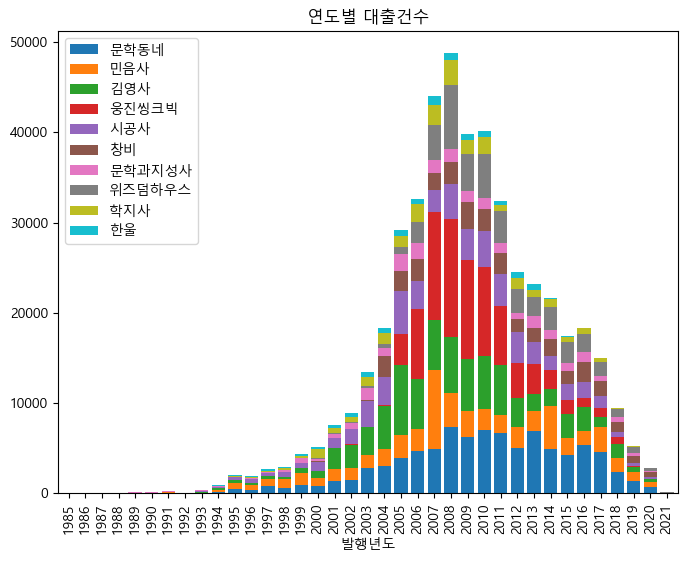

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(ax=ax, title='연도별 대출건수', stacked=True, width=0.8)
ax.legend(loc='upper left')
fig.show()